# Feature Selection Techniques

In [1]:
import pandas as pd
df = pd.read_csv("mobile_dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 1.Univariate Selection

In [36]:
X = df.iloc[:,:-1]
y= df["price_range"]

In [37]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [38]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
## Apply SelectBest Algorithm
select_obj = SelectKBest(score_func= chi2,k = 10)
selected = select_obj.fit(X,y)

In [28]:
selected.scores_ 

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [29]:
feature_score=pd.DataFrame(selected.scores_,index=X.columns,columns=["Score"])

In [30]:
feature_score

,Score
battery_power,14129.866576
blue,0.723232
clock_speed,0.648366
dual_sim,0.631011
fc,10.135166
four_g,1.521572
int_memory,89.839124
m_dep,0.745820
mobile_wt,95.972863
n_cores,9.097556


In [31]:
selected_Feature=feature_score["Score"].sort_values(ascending=False).head(12).index

In [32]:
selected_Feature

Index(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h', 'pc', 'n_cores'],
      dtype='object')

In [33]:
X = X[selected_Feature]

In [34]:
X.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h,pc,n_cores
0,2549,20,842,756,188,7,7,19,1,9,2,2
1,2631,905,1021,1988,136,53,3,7,0,17,6,3
2,2603,1263,563,1716,145,41,2,9,2,11,6,5
3,2769,1216,615,1786,131,10,8,11,0,16,9,6
4,1411,1208,1821,1212,141,44,2,15,13,8,14,2


In [35]:
X_Selected=[]
def Univariate_Selection(indipendant,dependent,N):    
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    select_obj = SelectKBest(score_func= chi2,k = 10)
    selected = select_obj.fit(indipendant,dependent)
    feature_score=pd.DataFrame(selected.scores_,index=indipendant.columns,columns=["Score"])["Score"].sort_values(ascending=False).reset_index()
    print(feature_score)    
    X_Selected.extend(feature_score["index"].head(N))
    

In [43]:
X_Selected

['ram',
 'px_height',
 'battery_power',
 'px_width',
 'mobile_wt',
 'int_memory',
 'sc_w',
 'talk_time',
 'fc',
 'sc_h',
 'pc',
 'n_cores']

2

In [42]:
Univariate_Selection(X,y,12)

            index          Score
0             ram  931267.519053
1       px_height   17363.569536
2   battery_power   14129.866576
3        px_width    9810.586750
4       mobile_wt      95.972863
5      int_memory      89.839124
6            sc_w      16.480319
7       talk_time      13.236400
8              fc      10.135166
9            sc_h       9.614878
10             pc       9.186054
11        n_cores       9.097556
12   touch_screen       1.928429
13         four_g       1.521572
14          m_dep       0.745820
15           blue       0.723232
16    clock_speed       0.648366
17       dual_sim       0.631011
18           wifi       0.422091
19        three_g       0.327643


In [44]:
X = X[X_Selected]

In [45]:
X.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h,pc,n_cores
0,2549,20,842,756,188,7,7,19,1,9,2,2
1,2631,905,1021,1988,136,53,3,7,0,17,6,3
2,2603,1263,563,1716,145,41,2,9,2,11,6,5
3,2769,1216,615,1786,131,10,8,11,0,16,9,6
4,1411,1208,1821,1212,141,44,2,15,13,8,14,2


## 2.Feature İmportance

this technique gives you a score for each feature of your data , higher the score more relevant it is

In [26]:
X = df.iloc[:,:-1]
y= df["price_range"]

In [6]:
from sklearn.ensemble import  ExtraTreesClassifier
import matplotlib.pyplot as plt
model_obj = ExtraTreesClassifier()
model_obj.fit(X,y)

ExtraTreesClassifier()

In [7]:
model_obj.feature_importances_

array([0.06281797, 0.01978558, 0.03373627, 0.01951414, 0.03227928,
       0.01757343, 0.03470339, 0.03329213, 0.03551192, 0.032423  ,
       0.03280952, 0.04705872, 0.04797272, 0.39658694, 0.03403538,
       0.03301059, 0.03415535, 0.0141204 , 0.01824296, 0.0203703 ])

In [15]:
feature_importance=pd.DataFrame(model_obj.feature_importances_,columns=["Score"],index=X.columns)

In [17]:
feature_importance["Score"].sort_values(ascending=False).reset_index()

,index,Score
0,ram,0.396587
1,battery_power,0.062818
2,px_width,0.047973
3,px_height,0.047059
4,mobile_wt,0.035512
5,int_memory,0.034703
6,talk_time,0.034155
7,sc_h,0.034035
8,clock_speed,0.033736
9,m_dep,0.033292


In [46]:

def Feature_importance(indipendant,dependent,N):    
    from sklearn.ensemble import  ExtraTreesClassifier
    select_obj = ExtraTreesClassifier()
    selected = select_obj.fit(indipendant,dependent)
    feature_score=pd.DataFrame(selected.feature_importances_,index=indipendant.columns,columns=["Score"])["Score"].sort_values(ascending=False).reset_index()
    print(feature_score)    
    
    return list(feature_score["index"].head(N))

In [69]:
Feature_importance(X,y,10)

            index     Score
0             ram  0.404392
1   battery_power  0.060900
2        px_width  0.047785
3       px_height  0.046943
4       mobile_wt  0.035151
5      int_memory  0.034366
6       talk_time  0.034279
7              pc  0.033110
8            sc_h  0.033032
9            sc_w  0.032803
10          m_dep  0.032679
11    clock_speed  0.032419
12        n_cores  0.032040
13             fc  0.031426
14       dual_sim  0.019326
15           blue  0.019057
16           wifi  0.019024
17   touch_screen  0.018551
18         four_g  0.017870
19        three_g  0.014850


['ram',
 'battery_power',
 'px_width',
 'px_height',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'pc',
 'sc_h',
 'sc_w']

In [70]:
X=X[['ram',
 'battery_power',
 'px_width',
 'px_height',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'pc',
 'sc_h',
 'sc_w']]

In [71]:
X.head()

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time,pc,sc_h,sc_w
0,2549,842,756,20,188,7,19,2,9,7
1,2631,1021,1988,905,136,53,7,6,17,3
2,2603,563,1716,1263,145,41,9,6,11,2
3,2769,615,1786,1216,131,10,11,9,16,8
4,1411,1821,1212,1208,141,44,15,14,8,2


### 3.Correlation

In [98]:
X = df.iloc[:,:-1]
y= df["price_range"]

In [99]:
import seaborn as sns
corr= df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


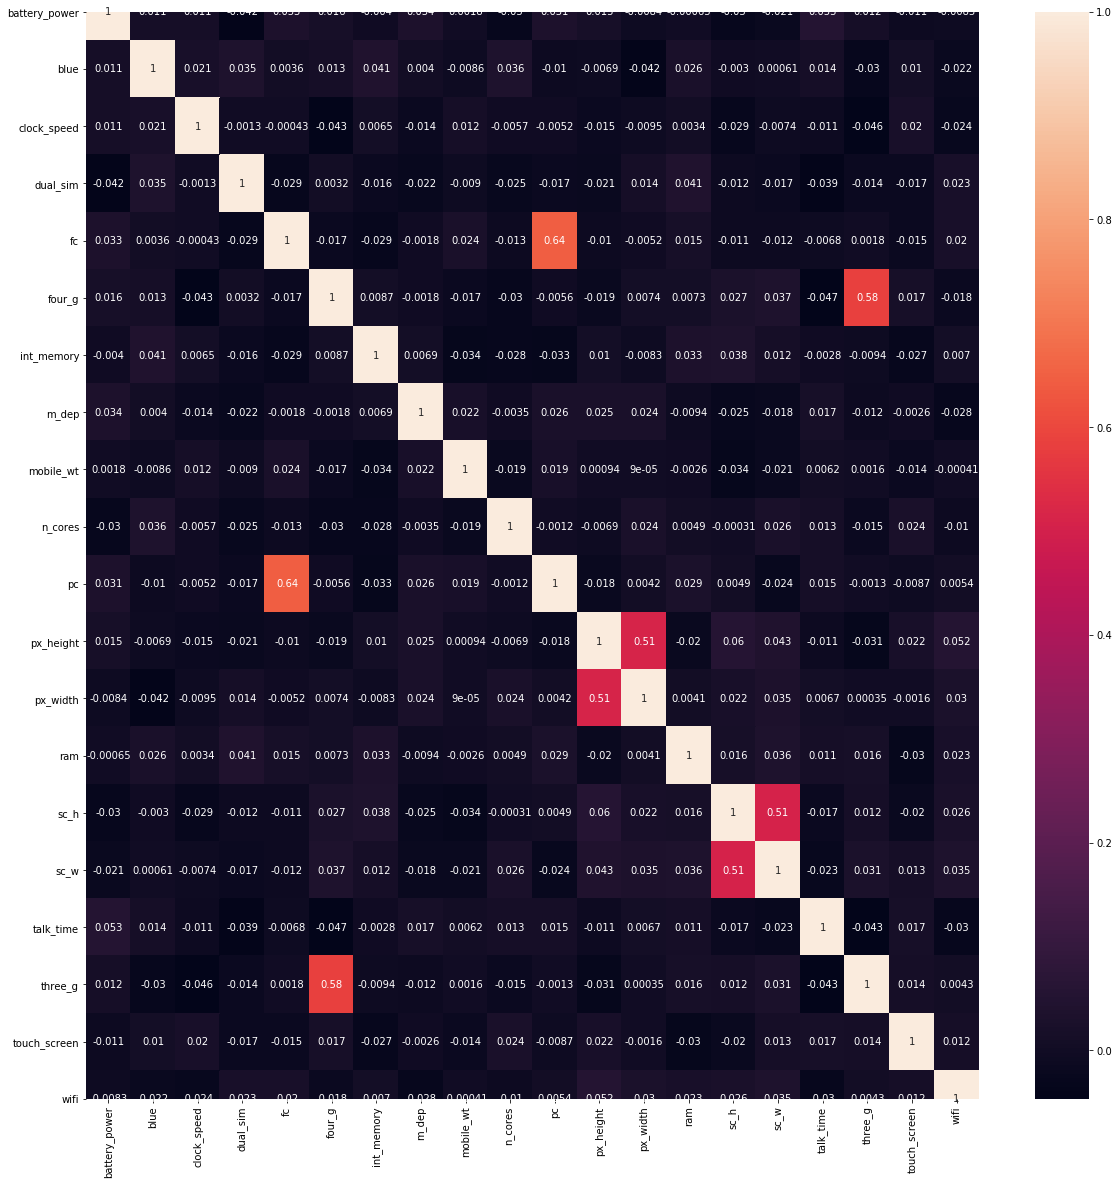

In [100]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True);

In [101]:
### rEMOVE tHE CORRELATED FEATURE

In [102]:
threshold = 0.5

In [103]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [104]:
correlation(X, threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [105]:
X=X.drop(['pc', 'px_width', 'sc_w', 'three_g'],axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,ram,sc_h,talk_time,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,20,2549,9,19,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,2631,17,7,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,2603,11,9,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,1216,2769,16,11,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,1208,1411,8,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,1222,668,13,19,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,915,2032,11,16,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,868,3057,9,5,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,336,869,18,19,1,1


### 4.Information Gain

In [140]:
X = df.iloc[:,:-1]
y= df["price_range"]

In [141]:
from sklearn.feature_selection import mutual_info_classif


In [142]:

mutual_info=mutual_info_classif(X,y)

In [143]:
mutual_data=pd.DataFrame(mutual_info,index=X.columns,columns=["Score"])
mutual_data["Score"].sort_values(ascending=False).reset_index()

,index,Score
0,ram,0.850724
1,battery_power,0.029972
2,four_g,0.029426
3,px_height,0.026974
4,n_cores,0.026745
5,px_width,0.026496
6,pc,0.018330
7,three_g,0.012542
8,touch_screen,0.010011
9,mobile_wt,0.006208


In [144]:
mutual_data["Score"].sort_values(ascending=False).head(12).index

Index(['ram', 'battery_power', 'four_g', 'px_height', 'n_cores', 'px_width',
       'pc', 'three_g', 'touch_screen', 'mobile_wt', 'blue', 'sc_w'],
      dtype='object')

In [145]:
X=X[['ram', 'px_width', 'battery_power', 'px_height', 'n_cores', 'mobile_wt',
       'sc_w', 'wifi', 'touch_screen', 'three_g', 'fc', 'four_g']]

In [146]:
X

,ram,px_width,battery_power,px_height,n_cores,mobile_wt,sc_w,wifi,touch_screen,three_g,fc,four_g
0,2549,756,842,20,2,188,7,1,0,0,1,0
1,2631,1988,1021,905,3,136,3,0,1,1,0,1
2,2603,1716,563,1263,5,145,2,0,1,1,2,1
3,2769,1786,615,1216,6,131,8,0,0,1,0,0
4,1411,1212,1821,1208,2,141,2,0,1,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,1890,794,1222,6,106,4,0,1,1,0,1
1996,2032,1965,1965,915,4,187,10,1,1,1,0,0
1997,3057,1632,1911,868,8,108,1,0,1,1,1,1
1998,869,670,1512,336,5,145,10,1,1,1,4,1
